In [1]:

!git clone https://github.com/shivansh9848/glaucoma-detection-FINAL.git

Cloning into 'glaucoma-detection-FINAL'...
remote: Enumerating objects: 1739, done.
remote: Counting objects: 100% (855/855), done.
remote: Compressing objects: 100% (853/853), done.
remote: Total 1739 (delta 2), reused 855 (delta 2), pack-reused 884
Receiving objects: 100% (1739/1739), 105.91 MiB | 25.82 MiB/s, done.
Resolving deltas: 100% (2/2), done.


2/2 [==============================] - 8s 3s/step
Accuracy = 0.7291666666666666
Recall = 0.75
Precision = 0.72


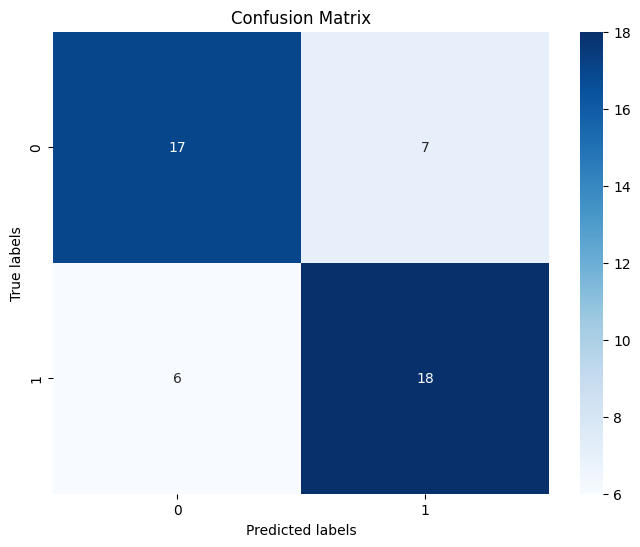

In [5]:
import numpy as np
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# Load and preprocess data
train_image = []
train_label = []
test_image = []
test_label = []
train_pos = '/content/glaucoma-detection-FINAL/U-NET/vgg16_data/positive_1'
train_neg = '/content/glaucoma-detection-FINAL/U-NET/vgg16_data/negative_1'
test_pos = '/content/glaucoma-detection-FINAL/U-NET/vgg16_data/positive_test'
test_neg = '/content/glaucoma-detection-FINAL/U-NET/vgg16_data/negative_test'

for filename in os.listdir(train_pos):
    img_path = os.path.join(train_pos, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_image.append(img)
    train_label.append(1)

for filename in os.listdir(train_neg):
    img_path = os.path.join(train_neg, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_image.append(img)
    train_label.append(0)

for filename in os.listdir(test_pos):
    img_path = os.path.join(test_pos, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_image.append(img)
    test_label.append(1)

for filename in os.listdir(test_neg):
    img_path = os.path.join(test_neg, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_image.append(img)
    test_label.append(0)

train_image = np.array(train_image) / 255.0
test_image = np.array(test_image) / 255.0

# Load pre-trained VGG16 model
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Extract features
train_features = VGG_model.predict(train_image)
test_features = VGG_model.predict(test_image)

# Flatten features
train_features_flatten = train_features.reshape(train_features.shape[0], -1)
test_features_flatten = test_features.reshape(test_features.shape[0], -1)

# Train RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(train_features_flatten, train_label)

# Predict
prediction_RF = RF_model.predict(test_features_flatten)

# Calculate metrics
accuracy = accuracy_score(test_label, prediction_RF)
recall = recall_score(test_label, prediction_RF)
precision = precision_score(test_label, prediction_RF)
cm = confusion_matrix(test_label, prediction_RF)

# Print metrics
print('Accuracy =', accuracy)
print('Recall =', recall)
print('Precision =', precision)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
